# Preprocessing and exploratory analysis

Reading dataset and dropping columns and preprocessing:

drug_consuption_3.txt
original personality scores
daily, weekly, monthly users of amphetamine, benzos, cannabis, heroin, ketamine, methadone are considered at risk of addiction (indicated with 1 otherwise 0).




Optionally is possible to get scores for personality traits divided in low (-1), medium (0), high (1) by the function binary_variables_traits.




In [1]:
import csv
import exploratory_analysis_plots

In [2]:
# Dictionary of scores with mean, standard deviation, minimum, and maximum values for traits
scores = {
    "Nscore": (0.00004, 0.99808, -3.46436, 3.27393),
    "Escore": (0.00016, 0.99745, -3.27393, 3.27393),
    "Oscore": (-0.00053, 0.99623, -3.27393, 2.90161),
    "Ascore": (-0.00024, 0.99744, -3.46436, 3.46436),
    "Cscore": (-0.00039, 0.99752, -3.46436, 3.46436),
    "Impulsiveness": (0.00721, 0.95446, -2.55524, 2.90161),
    "Sens_seeking": (-0.00329, 0.96370, -2.07848, 1.92173),
}

scores_indexed = enumerate(scores)


# Function to read  dataset
def read_text_dataset(file_path):
    with open(file_path, "r") as file:
        dataset = [line.strip().split(",") for line in file.readlines()]

    return dataset


# Function to write dataset to another text file
def write_to_file(dataset, output_file):
    with open(output_file, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(dataset)


# keep only personality scores, amphetamine, benzos, cannabis, heroin, ketamine, methadone, serm columen
def drop_columns(dataset):
    for row in dataset:
        for column_index in sorted(
            [1, 2, 3, 4, 5, 13, 15, 17, 19, 20, 21, 22, 25, 26, 28, 29, 31],
            reverse=True,
        ):
            del row[column_index]


# binary values for "in the last day", "in the last week", "in the last month"
def binary_variables_drug_use(dataset):
    for row in dataset:
        for i in range(8, 14):
            # consider weekly heroin users as at risk of addiction
            # if i == 11 and row[i] == "CL5":
            #     row[11] = 1
            # # daily users
            # elif row[i] == "CL6":
            #     row[i] = 1
            if row[i] == "CL6" or row[i] == "CL5" or row[i] == "CL4":
                row[i] = 1
            else:
                row[i] = 0

        # flag all the people that claim to have used the fictional drug
        if row[14] != "CL0":
            row[14] = 1
        else:
            row[14] = 0


def binary_variables_traits(dataset):
    for row in dataset:
        for idx, (key, value) in enumerate(scores.items()):
            mean = value[0]
            stand_dev = value[1]

            # all the high scores are the ones above mean + sd
            if float(row[idx + 1]) > mean + stand_dev:
                # medium scores are the ones in the range mean+- sd
                row[idx + 1] = 1
            elif (
                float(row[idx + 1]) < mean + stand_dev
                and float(row[idx + 1]) > mean - stand_dev
            ):
                row[idx + 1] = 0
            # low scores are the ones in the below mean + sd
            else:
                row[idx + 1] = -1


# Input text dataset file path
input_file_path = "drug_consumption.txt"

# Output CSV file path
output_csv_path = "drug_consumption_3.txt"

# Read text dataset
dataset = read_text_dataset(input_file_path)

# drop columns that are not used
drop_columns(dataset)

# for converting drug use to 0 not risk of addiction 1 risk of addiction
binary_variables_drug_use(dataset)


# for converting traits in -1 low score, 0 medium score, 1 high score
# binary_variables_traits(dataset)

# Write dataset in a new file
write_to_file(dataset, output_csv_path)
dataset_new = read_text_dataset("drug_consumption_3.txt")

Bar plot for users of each drug 

[237, 298, 781, 53, 77, 171]
[238, 299, 788, 53, 79, 171]


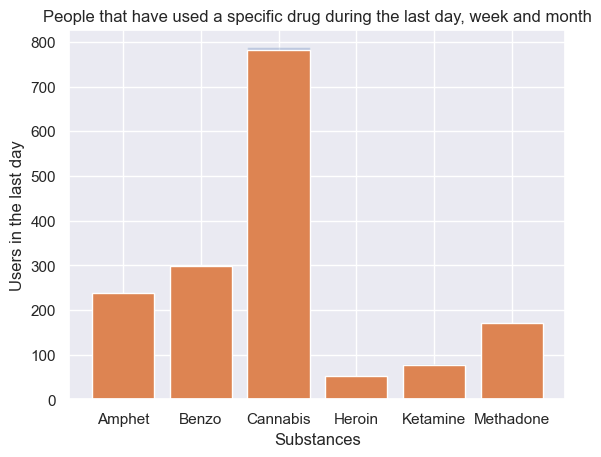

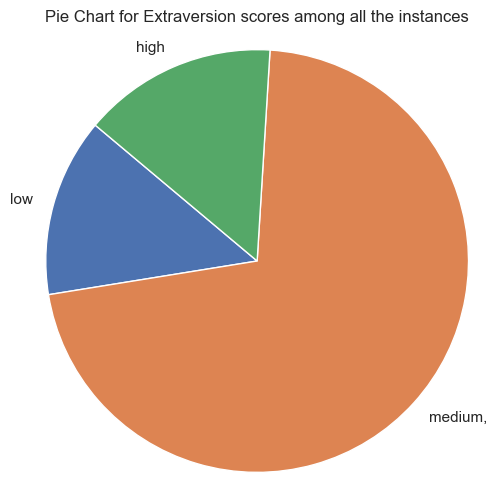

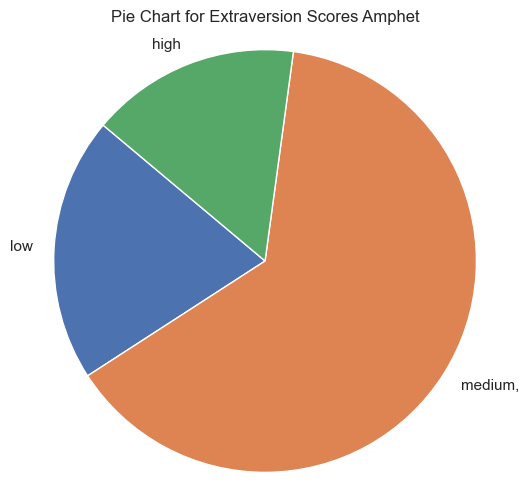

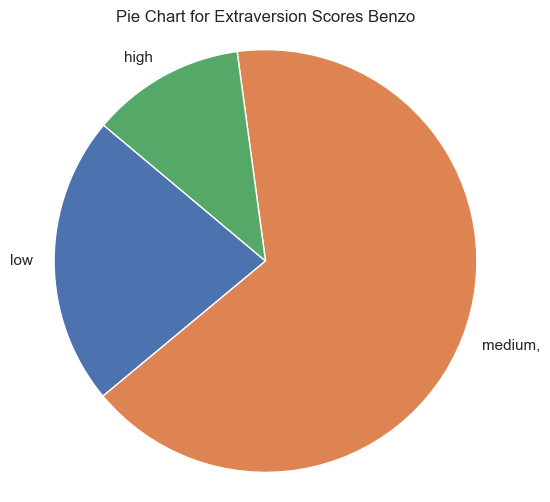

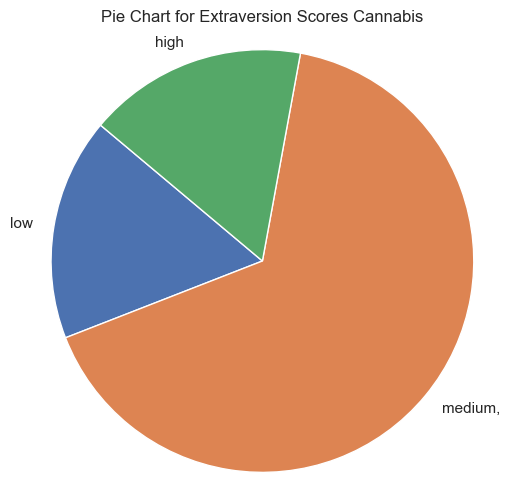

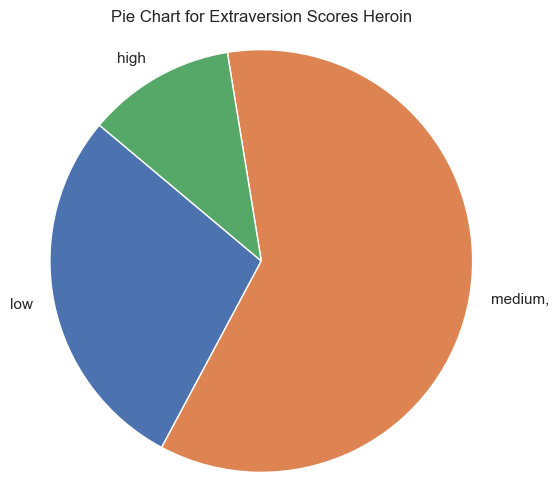

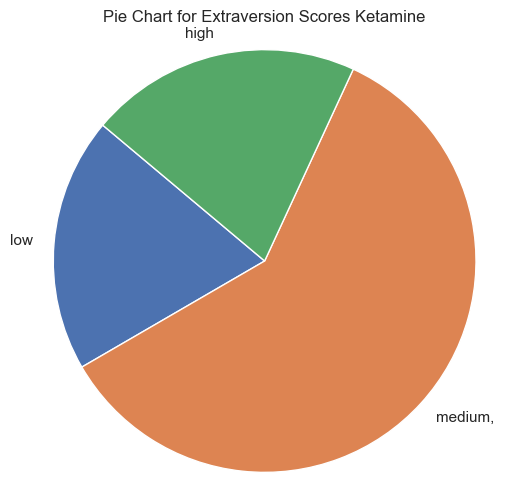

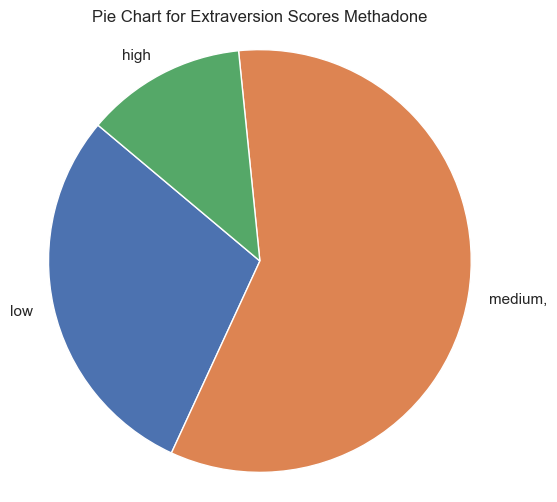

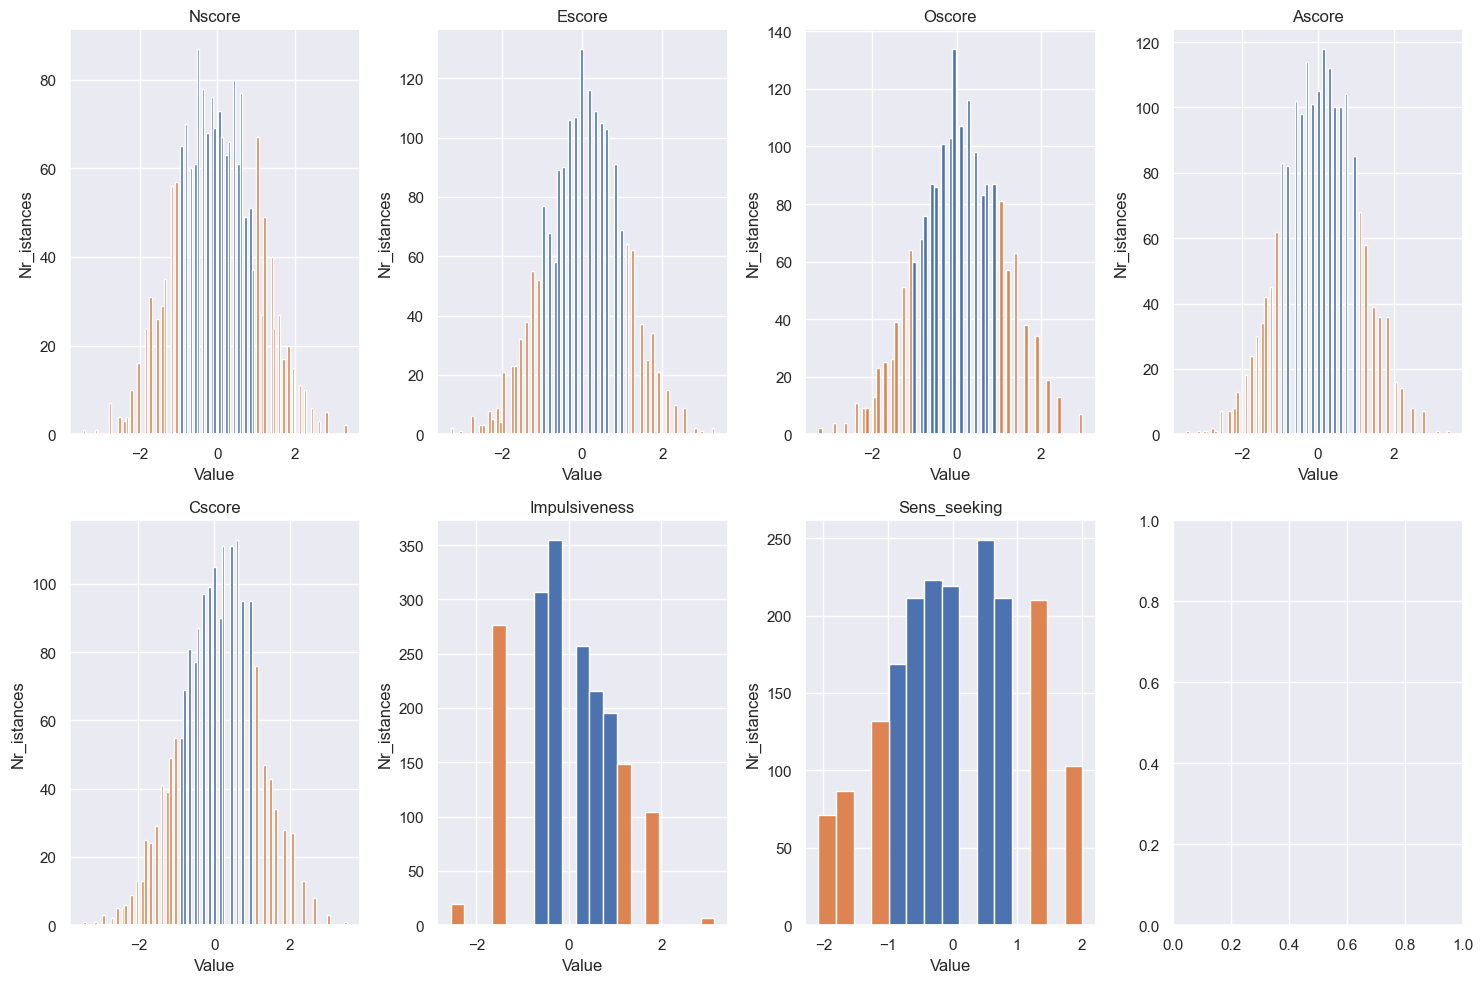

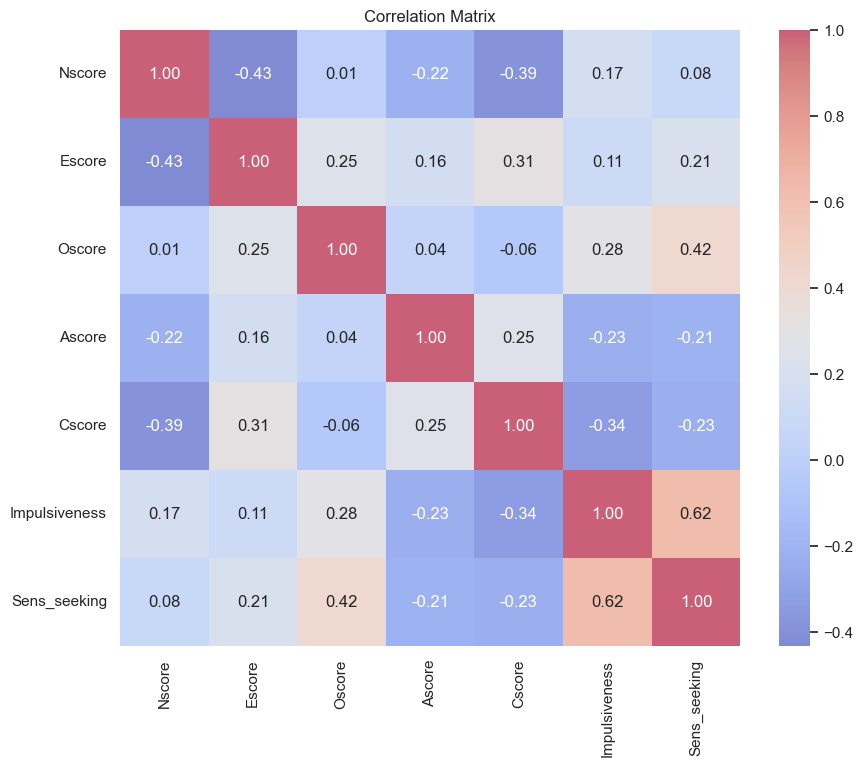

In [3]:
categories = ["Amphet", "Benzo", "Cannabis", "Heroin", "Ketamine", "Methadone"]

exploratory_analysis_plots.Plots.histogram_DrugUse(dataset_new, categories)

exploratory_analysis_plots.Plots.piechart_extraversion(dataset_new)

exploratory_analysis_plots.Plots.piechart_extr_subst(dataset_new, categories)

exploratory_analysis_plots.Plots.histograms_personality_density(dataset_new, scores)

exploratory_analysis_plots.Plots.heatmap("drug_consumption_3.txt", scores)